# Part2_Federated_Learning

# Federated Deep Learning For a Privacy-preserved Activity Recognition

### Presentation by :

####  Setareh Kazemi Kheiri (UB Person No.: 50415734)
####  Siri Valluri (UB Person No.: 50372657) 

* To access the Part1_Data_Preparation JUPYTER notebook, please refer to this link on google drive:

https://drive.google.com/file/d/1-EClBslBFpzL9jRogPKJPHpvaUZJ9zc_/view?usp=sharing
* To access the Part2_Federated_Learning JUPYTER notebook, please refer to this link on google drive:

https://drive.google.com/file/d/1zRcaznsXWUW_CtuU1tzuJ2hNnUlbI6z-/view?usp=sharing

## Contents :

#### * Motivation

#### * Federated Learning Concepts

#### * Federated Optimization
      1) Federated Average - Challenges
      2) Federated Algorithm 2
      3) Federated Algorithm 3
      
#### *Federated Learning Formula

#### *Our Work
      1) Simulation of Federated Learning on the preprocessed dataset
      
#### *Results and Discussion

#### *Limitations and Future Scope

#### *Conclusion
      

# Motivation


* One of the major obstacles to fully enable the use of such wearable trackers in most of the workplaces
is conservation of operators’ privacy while using their inputs in analyses needed for Human Activity Recognition.





* A survey of the American Society of Safety Engineers (ASSE) revealed that 81% supported the notion of using wearable
sensors to study the risk factors associated with occupational health, however, **privacy and confidentiality** of
collected data was among the most raised concerns among the respondents 

# Federated Learning


* Standard machine learning approaches require centralizing the training data on one machine or in a datacenter. 

* And Google has built one of the most secure and robust cloud infrastructures for processing this data to make our services better. 

* Now for models trained from user interaction with mobile devices, Google introduced an additional approach: **Federated Learning**

 ## Concept
 
 * Federated Learning enables mobile devices to collaboratively learn a shared prediction model while keeping all the training data on device.


 * This eliminates the need to store the data in the cloud for Machine Learning Models.

The lifecycle of an FL-trained model and the various elements in a federated learning system.



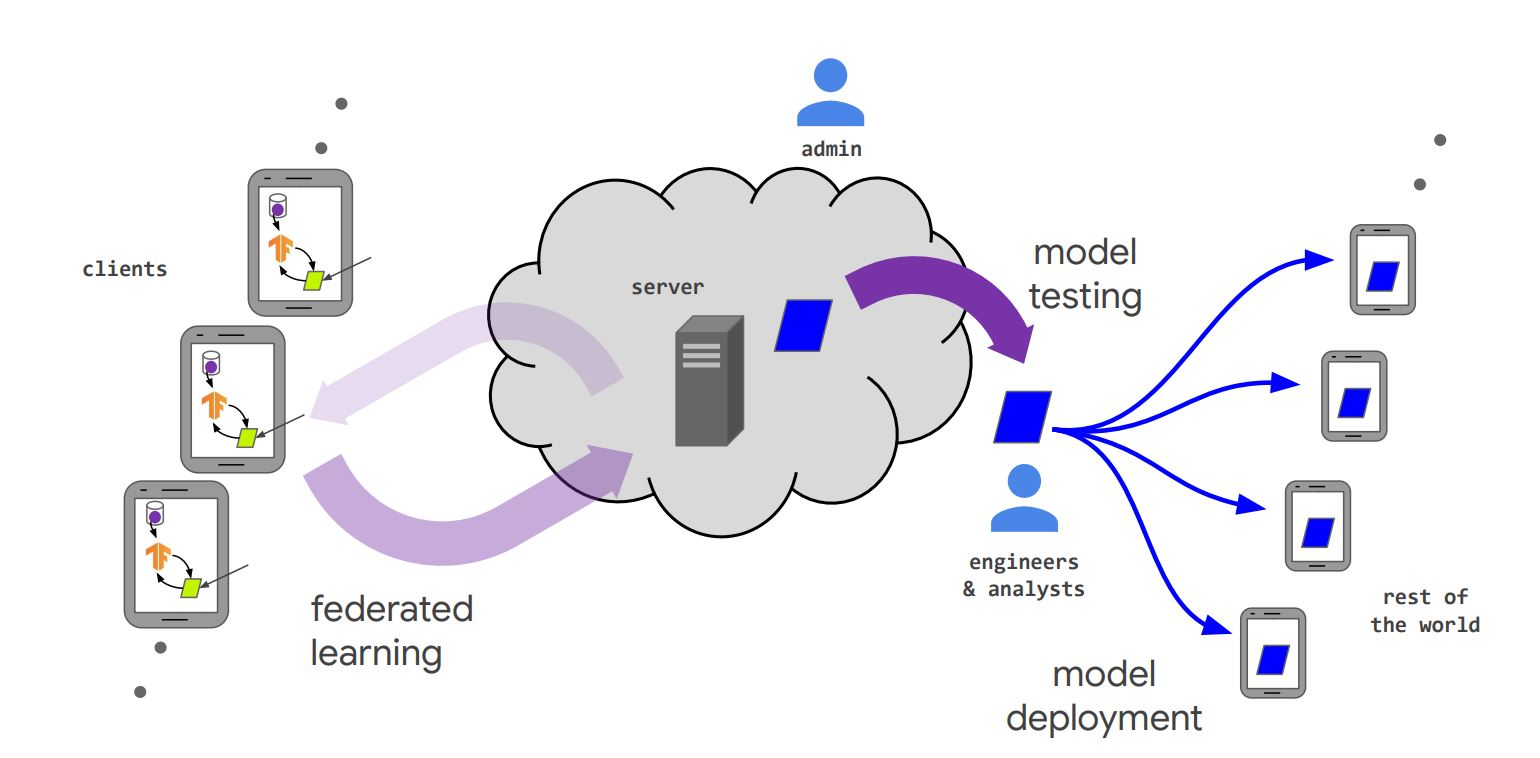

Source of image :

@inproceedings{49232,
title	= {Advances and Open Problems in Federated Learning},
author	= {Peter Kairouz and H. Brendan McMahan and Brendan Avent and Aurélien Bellet and Mehdi Bennis and Arjun Nitin Bhagoji and K. A. Bonawitz and Zachary Charles and Graham Cormode and Rachel Cummings and Rafael G.L. D'Oliveira and Salim El Rouayheb and David Evans and Josh Gardner and Zachary Garrett and Adrià Gascón and Badih Ghazi and Phillip B. Gibbons and Marco Gruteser and Zaid Harchaoui and Chaoyang He and Lie He and Zhouyuan Huo and Ben Hutchinson and Justin Hsu and Martin Jaggi and Tara Javidi and Gauri Joshi and Mikhail Khodak and Jakub Konečný and Aleksandra Korolova and Farinaz Koushanfar and Sanmi Koyejo and Tancrède Lepoint and Yang Liu and Prateek Mittal and Mehryar Mohri and Richard Nock and Ayfer Özgür and Rasmus Pagh and Mariana Raykova and Hang Qi and Daniel Ramage and Ramesh Raskar and Dawn Song and Weikang Song and Sebastian U. Stich and Ziteng Sun and Ananda Theertha Suresh and Florian Tramèr and Praneeth Vepakomma and Jianyu Wang and Li Xiong and Zheng Xu and Qiang Yang and Felix X. Yu and Han Yu and Sen Zhao},
year	= {2019},
URL	= {https://arxiv.org/abs/1912.04977}
}




## Criteria of Ideal Problems

1) Training on real-world data from mobile devices provides a distinct advantage over training on proxy data that is generally available in the data center. 
 

2) This data is privacy sensitive or large in size (compared to the size of the model), so it is preferable not to log it to the data center purely for the purpose of model training. 


3) For supervised tasks, labels on the data can be inferred naturally from user interaction.

# Federated Optimization 

## Refers to the implicit problem of distributed optimization.

### Unique properties of Federated Optimization :


* Non-IID :

The training data on a given client is typically
based on the usage of the mobile device by a particular
user, and hence any particular user’s local dataset will
not be representative of the population distribution.


* Unbalanced :

Similarly, some users will make much
heavier use of the service or app than others, leading
to varying amounts of local training data.


# Federated Learning Formula


The equation below shows the optimization problem that we seek to solve in federated learning, where $F_i (x)=E_{z \sim D_i}[f_i(x,z)]$ is the loss function of the $i^{th}$ client, $z \in Z$, and $D_i$ is the data distribution for the the $i^{th}$ client.


\begin{equation}
\label{eqn:optfunc}
\min_{x\in R^d}f(x) = \frac{1}{m}\sum_{i=1}^{m}F_i (x)
\end{equation}




In order to solve the equation, at each round of the FedAvg, a subset of clients (i.e. participants in our experiment) are randomly selected and run an optimizer with initialized parameters shared by the global model. Client will then update their loss function and consecutively send their updated model to the server. In the next step, the global model is updated by taking the weighted average in these models. Equation below shows the update of FedAvg at round $t$, when the server model is $x_t$. In this equation, $S$ is the sampled set of clients, $x_{i}^{t}$ is the model of client $i \in S$ after the local training. Let $\Delta_{i}^{t}:=x_{i}^{t}-x_t$ and $\Delta_t:=\frac{1}{|S|}\sum_{i \in S} \Delta_{i}^{t}$. The algorithm shows the family of FedOpt algorithms with ClientOpt and ServerOpt optimizers with learning rates of $\eta$ and $\eta_l$, respectively. In adaptive optimizers, such as ADAM, the learning rates of $\eta$ and $\eta_l$ are allowed to depend on the round $t$ to encompass learning rate schedules.


\begin{equation}
\label{eqn:fedupt}
x_{t+1} = \frac{1}{|S|}\sum_{i \in S}x_{i}^{t}=x_t-\frac{1}{|S|}\sum_{i \in S}(x_t-x_{i}^{t})
\end{equation}


# Federated Algorithm 1 :The FederatedAveraging Algorithm (FedAvg)

### The goal is to minimize the global loss which is calculated as the weighted average of individual clients’ losses.




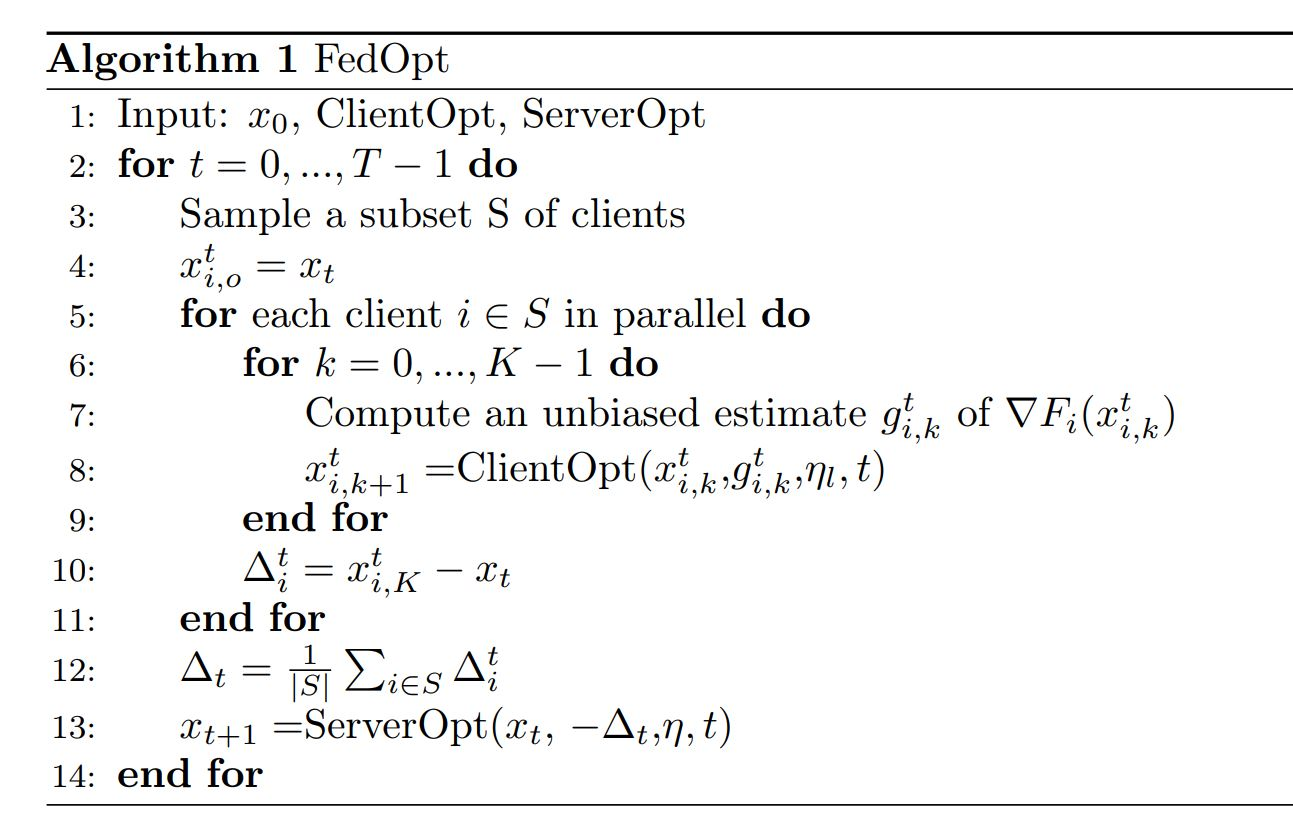

## Challenges in Federated Averaging Algorithm:

1) Lack of consideration of the heterogeneity of clients.

2) Client drift : when clients move away from the globally optimal models.

3) Lack of adaptivity that happens with heavy-tail stochastic gradient noise distributions.

## Solution : Adaptive Learning Rates.

1) Provide the knowledge of past iteration and lead to performing a more informed optimization.

2) Adaptive learning rates on server will prevent the increase in storage and communication costs.

# Federated Algorithm 2 :

### Algorithm 2 is the pseudo-code for an adaptive FL which considers SGD optimizer at clients and Adam optimizer at the server’s side.

The τ shown in algorithm 2 represents the degree of adaptivity, and the smaller it is the more
adaptive the method.

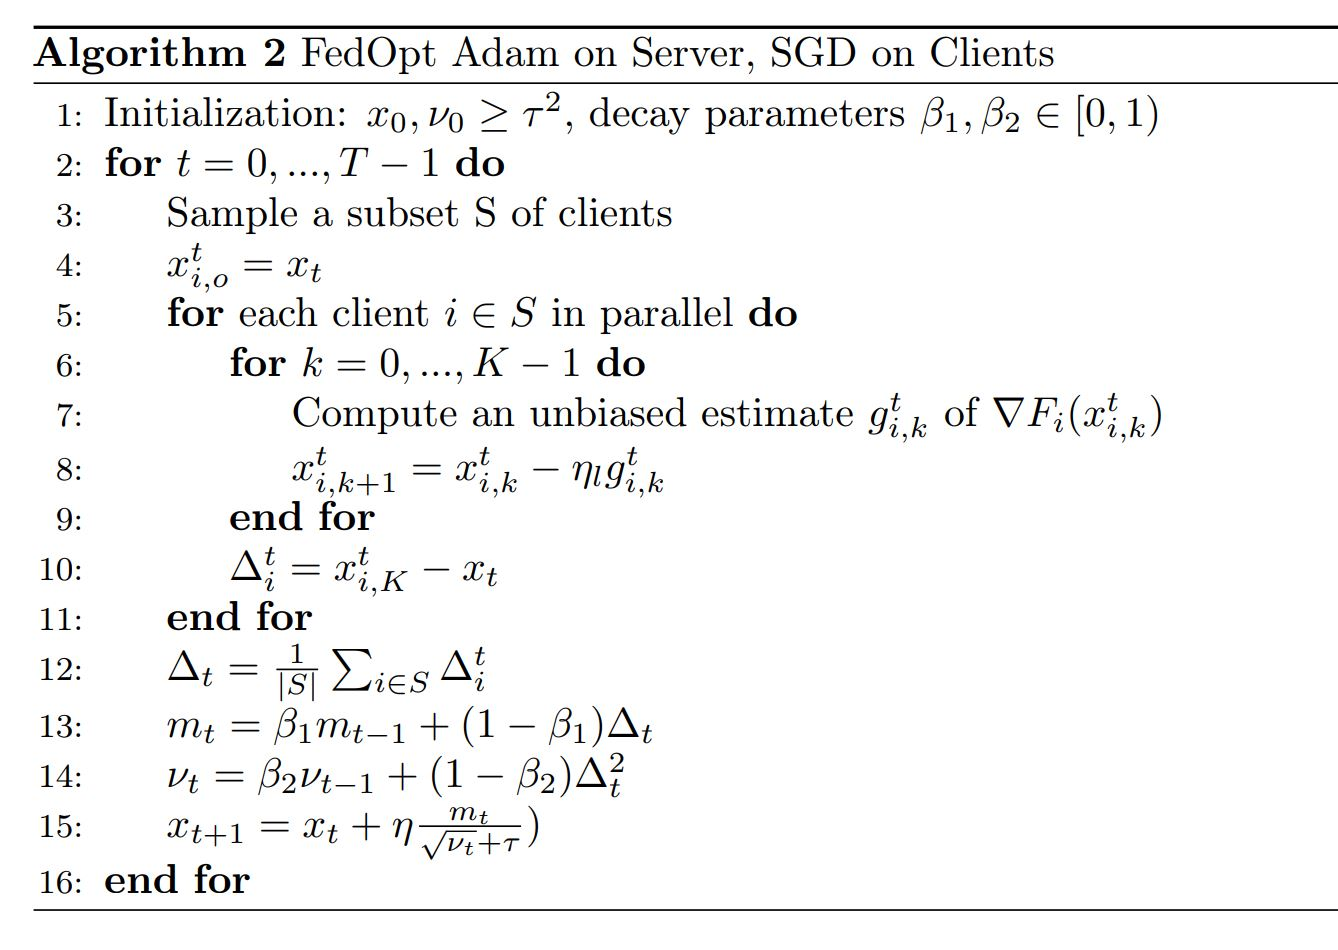

# Federated Algorithm 3 :


### The pseudo-code that we used in our study is illustrated in 3. 

The main difference between the Algorithm3 and Algorithm2 pseudo-codes is that in the former the Adam optimizer is used for both clients and the server, while the latter only uses the Adam optimizer at the server’s side.

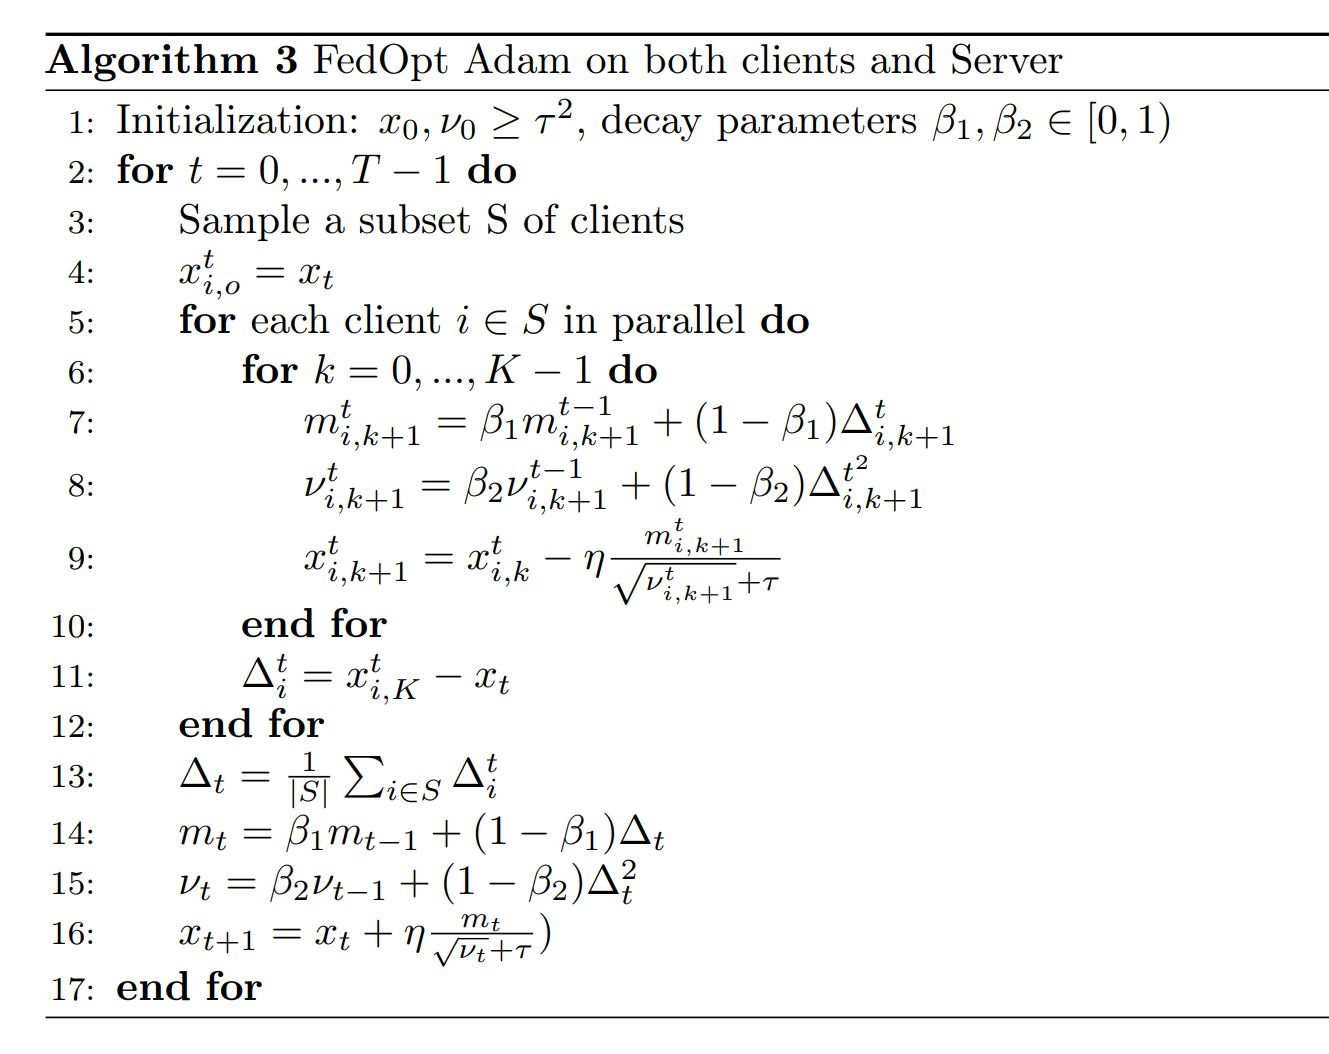

# Our Work 

## Federated Learning Simulation on the dataset described previously

Study the performance of a deep neural network that is trained in a federated approach with adaptive learning rates as comapred to the traditional learning algorithms that fail to preserve **data privacy**.

# Importing required packages

In [45]:
import tensorflow as tf
import tensorflow_federated as tff
import pandas as pd
import numpy as np
import random
from collections import OrderedDict

In [46]:
random.seed(2023)
random.seed(2023)
print(random.random())

0.3829219244542088


# Loading Preprocessed Data from previous module

In [47]:
df = pd.read_csv("finaldf.csv")
df = df.iloc[:,1:].drop("train/test",axis=1)        #dropping the train/test column
df.head()

,1,2,3,4,5,6,7,8,9,10,...,209,210,211,212,213,214,215,216,label,subID
0,-202.369375,215.118065,55.656564,72.954904,-269.754271,10.968402,-226.456294,-256.646628,-180.772820,2.772589,...,-13.370222,11.763840,0.133770,-1.956675,1.973620,5.09375,96,94,electricPanel,9
1,-209.831628,223.643187,63.099344,77.375468,-377.260200,-62.785361,-218.209597,-250.977936,-147.779424,2.772589,...,-12.910773,23.217636,-0.192897,-2.209475,1.885177,5.09375,97,97,electricPanel,9
2,-173.170956,181.570817,49.184769,54.587376,-273.359016,-117.303672,-145.465089,-240.158214,-130.995137,2.772589,...,-14.990492,17.982041,0.378436,-2.191175,2.499541,5.09375,94,96,electricPanel,9
3,-212.735277,224.208071,62.384244,70.802270,-349.418601,-101.738602,-199.032898,-277.932409,-140.332137,2.772589,...,-14.938056,14.905143,0.145437,-2.379734,2.055955,5.09375,103,103,electricPanel,9
4,-281.992332,299.937022,85.780208,102.188755,-371.478757,-25.197840,-342.289983,-351.518113,-221.366235,2.772589,...,-8.983662,12.037496,0.500430,-1.260421,2.210831,5.09375,93,92,electricPanel,9


# Representing Labels as decimals (1-10) classes

In [48]:
Unique_labels = df.label.unique()
labels_dict = {Unique_labels[i]:i for i in range(0,10)}
print(labels_dict)
labels_dict.keys()

{'electricPanel': 0, 'hoist': 1, 'ladder': 2, 'lift': 3, 'overhead': 4, 'push': 5, 'sit': 6, 'stand': 7, 'type': 8, 'walk': 9}


dict_keys(['electricPanel', 'hoist', 'ladder', 'lift', 'overhead', 'push', 'sit', 'stand', 'type', 'walk'])

In [49]:
df=df.replace({"label": labels_dict})

# List of client ID's

In [50]:
ID = df.subID.unique()
ID = sorted(list(ID))
print(ID)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


## Representing data as an ordered dictionary of (Features, Labels) tuples

In [51]:
dataset_dict = OrderedDict()
for i in ID:
    data = OrderedDict((("Features", df[df["subID"]==i].drop(["subID","label"],axis=1)),("Labels", df["label"][df["subID"]==i])))
    dataset_dict[i] = data

# Train and Test Data

### Randomly splitting Clients into Train and Test Clients in the ratio of 80% : 20%

In [52]:
random.seed(2023)
test_lab = random.sample(ID,8)
print(test_lab)
train_lab = [x for x in ID if x not in test_lab]
print(train_lab)

[32, 36, 44, 28, 29, 14, 33, 11]
[8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 34, 35, 37, 38, 39, 40, 41, 42, 43]


In [53]:
train_df = df[np.isin(df["subID"],train_lab)].drop("subID",axis=1)
test_df = df[np.isin(df["subID"],test_lab)].drop("subID",axis=1)

# Simulation of Federated Learning


To simulate a federated learning scenario, we make use of **TensorflowFederated (TFF)**, an open-source framework for federated machine learning. The Federated Learning (FL) API offers a set of high-level interfaces that allow application of federated training and evaluation to our existing TensorFlow model. 


# Preprocessing data for federated learning


* To make use of the high-level federated interfaces provided by TFF, input data is required to be of the type “tf.data.Dataset”. 

* We achieve this using the function “tf.data.Dataset.from_tensor_slices”. 




In [54]:
dataset_tf=[]
 
for i in train_lab:
    per_client = tf.data.Dataset.from_tensor_slices(dataset_dict[i])
    dataset_tf.append(per_client)

Once we have the input data of type “tf.data.Dataset”, data set transformations such as flattening feature vectors, shuffling individual examples and organizing them into batches can be performed.

In [55]:
Batch_size = 70
Num_Epochs = 10
Shuffle_Buffer = 100
Prefetch_Buffer = 10

def preprocess(dataset):
    def batch_format_fn(element):
        
        return OrderedDict(x=tf.reshape(element['Features'], [-1, 216]),y=tf.reshape(element['Labels'], [-1, 1]))

    return dataset.repeat(Num_Epochs).shuffle(Shuffle_Buffer, seed=1).batch(Batch_size).map(batch_format_fn).prefetch(Prefetch_Buffer)

# Federated Training Data

In [56]:
dataset_tf_train=[]                                       
 
for i in train_lab:
    per_client = tf.data.Dataset.from_tensor_slices(dataset_dict[i])
    dataset_tf_train.append(per_client)

In [57]:
federated_train_data = [preprocess(dataset_tf_train[x])
  for x in range(0,len(train_lab))
]

# Federated Test Data


In [58]:
dataset_tf_tst=[]
 
for i in test_lab:
    per_client = tf.data.Dataset.from_tensor_slices(dataset_dict[i])
    dataset_tf_tst.append(per_client)
    


In [59]:
federated_test_data_overall = [preprocess(dataset_tf_tst[x])            # for overall metrics
  for x in range(0,len(test_lab))
]

In [60]:
federated_test_data_client_wise = [[preprocess(dataset_tf_tst[x])]            #For client-wise metrics
  for x in range(0,len(test_lab))
]

# Defining Deep Learning Model 

* We then define our neural network with a dense layer of 10 units as there are 10 classes in this task of classification. 



* The shape of input feature vector is of dimensions (216x1). 



* Sparse Categorical Cross Entropy is used as the loss function as there are more than two classes and labels are provided as integers (1 to 10). 



* In order to use any model with **TFF**, it needs to be wrapped in an instance of the “tff.learning.Model” interface, which exposes methods to stamp the model’s forward pass, metadata properties, and also introduces additional elements, such as ways to control the process of computing federated metrics.



* We implement this by invoking the “tff.learning.from_keras_model” function.

In [61]:
def model_fn():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, tf.nn.softmax, input_shape=(216,),
                            kernel_initializer='zeros')
  ])
  return tff.learning.from_keras_model(
      model,
      input_spec=federated_train_data[0].element_spec,
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


# Training the model on Federated Training Data

* We now have a model wrapped as **“tff.learning.Model”** for use with TFF. 


* We invoke the **“tff.learning.algorithms.build_weighted_fed_avg”** function to let TFF construct a Federated Averaging algorithm. 


* This function has two optimizer parameters : a **client-optimizer** and a **server-optimizer**. 


* The client-optimizer is only used to compute local model updates on each client. The server-optimizer applies the averaged update to the global model at the server. We use the **“Adam”** Optimizer for both the client and server optimizer which uses an adaptive learning rate.


* Global weights updation is done for 20 rounds.




# Model 1 : 

### Adam Optimizer for server optimization and SGD for client optimization.

In [62]:
trainer = tff.learning.algorithms.build_weighted_fed_avg(
  model_fn,
  client_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0),
  server_optimizer_fn=lambda: tf.keras.optimizers.Adam())

state = trainer.initialize()
for x in range(0,20):
  result = trainer.next(state, federated_train_data)
  state = result.state
  metrics = result.metrics
  print('round {:2d}, metric={}'.format(x,metrics))


round  0, metric=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.27261692), ('loss', 11.343184), ('num_examples', 61790), ('num_batches', 897)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  1, metric=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.25253278), ('loss', 11.836238), ('num_examples', 61790), ('num_batches', 897)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  2, metric=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.25262988), ('loss', 11.865753), ('num_examples', 61790), ('num_batches', 897)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('fi

## Evaluation 


The function **build_federated_evaluation()** function from the TFF library builds the TFF computation for federated evaluation of the given model.

In [34]:
evaluation = tff.learning.build_federated_evaluation(model_fn)

### Train Accuracy of Model 1 = 75.85%



In [35]:
model_weights = trainer.get_model_weights(state)
train_metrics = evaluation(model_weights, federated_train_data)
print(train_metrics)

OrderedDict([('eval', OrderedDict([('sparse_categorical_accuracy', 0.758537), ('loss', 3.0572271), ('num_examples', 61790), ('num_batches', 897)]))])


### Overall Test Accuracy of Model 1 = 78.69%

In [36]:
test_metrics_overall = evaluation(model_weights, federated_test_data_overall)
print(test_metrics_overall)

OrderedDict([('eval', OrderedDict([('sparse_categorical_accuracy', 0.7869318), ('loss', 2.7885072), ('num_examples', 17600), ('num_batches', 255)]))])


### Client-wise Test Accuracy of Model 1 

In [37]:
test_metrics_client_wise =[]
for i in range(0,len(test_lab)):
    x = evaluation(model_weights, federated_test_data_client_wise[i])
    test_metrics_client_wise.append(x)
    
test_metrics_client_wise

[OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.8027523),
                            ('loss', 2.7871587),
                            ('num_examples', 2180),
                            ('num_batches', 32)]))]),
 OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.7004405),
                            ('loss', 2.8451324),
                            ('num_examples', 2270),
                            ('num_batches', 33)]))]),
 OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.8146552),
                            ('loss', 2.642529),
                            ('num_examples', 2320),
                            ('num_batches', 34)]))]),
 OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.75446427),
                            ('loss', 2.7194684),
                            ('num_examples', 2240),
                            ('num_batches', 32)]))]),


# Model 2 :

### Adam Optimizer for both server and client optimization.

In [38]:
trainer2 = tff.learning.algorithms.build_weighted_fed_avg(
  model_fn,
  client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
  server_optimizer_fn=lambda: tf.keras.optimizers.Adam())

state2 = trainer2.initialize()
for x in range(0,20):
  result2 = trainer2.next(state2, federated_train_data)
  state2 = result2.state
  metrics2 = result2.metrics
  print('round {:2d}, metric={}'.format(x,metrics2))

round  0, metric=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.8224308), ('loss', 0.74971104), ('num_examples', 61790), ('num_batches', 897)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  1, metric=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.8543454), ('loss', 0.60128486), ('num_examples', 61790), ('num_batches', 897)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
round  2, metric=OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('sparse_categorical_accuracy', 0.8640557), ('loss', 0.66180766), ('num_examples', 61790), ('num_batches', 897)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('fi

## Train Accuracy of Model 2 = 88.85%

In [40]:
model_weights2 = trainer2.get_model_weights(state2)
train_metrics2 = evaluation(model_weights2, federated_train_data)
print(train_metrics2)

OrderedDict([('eval', OrderedDict([('sparse_categorical_accuracy', 0.8884933), ('loss', 0.9896842), ('num_examples', 61790), ('num_batches', 897)]))])


## Overall Test Accuracy of Model 2 = 90.74%

In [41]:
test_metrics_overall2 = evaluation(model_weights2, federated_test_data_overall)
print(test_metrics_overall2)

OrderedDict([('eval', OrderedDict([('sparse_categorical_accuracy', 0.90738636), ('loss', 0.4218531), ('num_examples', 17600), ('num_batches', 255)]))])


## Client-wise Test Accuracy of Model :


In [42]:
test_metrics_client_wise2 =[]
for i in range(0,len(test_lab)):
    x = evaluation(model_weights2, federated_test_data_client_wise[i])
    test_metrics_client_wise2.append(x)
    
test_metrics_client_wise2

[OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.9908257),
                            ('loss', 0.020535974),
                            ('num_examples', 2180),
                            ('num_batches', 32)]))]),
 OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.7621145),
                            ('loss', 0.9611671),
                            ('num_examples', 2270),
                            ('num_batches', 33)]))]),
 OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.8965517),
                            ('loss', 0.40752247),
                            ('num_examples', 2320),
                            ('num_batches', 34)]))]),
 OrderedDict([('eval',
               OrderedDict([('sparse_categorical_accuracy', 0.8660714),
                            ('loss', 0.9163572),
                            ('num_examples', 2240),
                            ('num_batches', 32)]))]


# Results and Discussion :



* In this section we compare the results of running the adaptive federated methods: algorithm 2 (referred to as FedOpt1 in the results) and algorithm 3 (referred to as FedOpt2 in the results) on classification of electrical line workers activities.



* We also compare these results obtained with the ones reported in the reference paper.


Reference Paper Source : 
    
@unpublished{LamookiHajifar2021HAR, author ={Lamooki, Saeb Ragani and Hajifar, Sahand and Hannan, Jacqueline and Sun, Hongyue and Megahed, Fadel M and Cavuoto, Lora A}, title = {Classifying tasks performed by electrical line workers using a wrist-worn sensor: A data analytic approach}, year={2022}, journal = {PLOS ONE}, note = {(in press)} }

### The average test accuracy of traditional learning methods compared to the federate learning method :

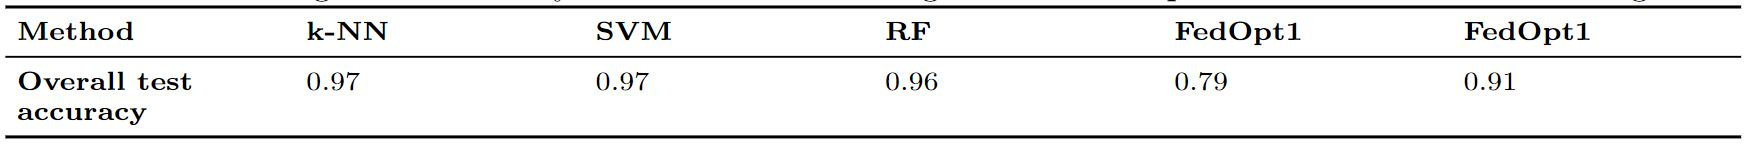

###  The test accuracy among different clients (participants) are compared between FedOpt1 and FedOpt2 algorithms.

* It is notable that for all of the clients the **FedOpt2 has a higher accuracy**.

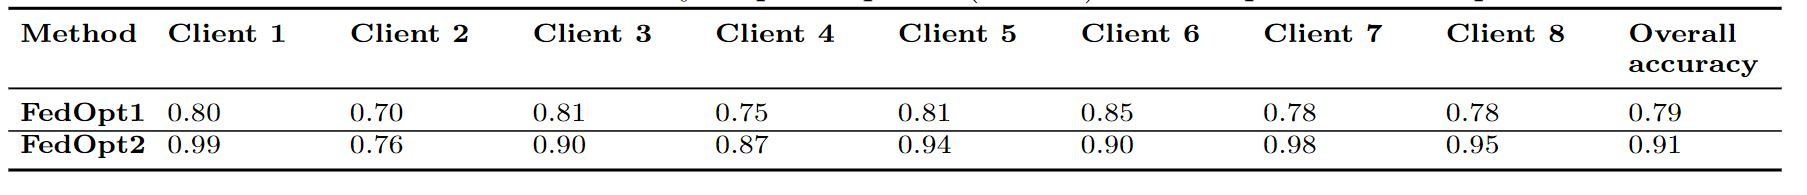

#### From the above tables :

1) It can be seen that the accuracies of both FedOpt algorithms do not exceed the high accuracies (> 0.96) of the traditional algorithms from the reference paper. This lack of performance can be attributed to 
     1) Our neural network being a basic one with only 1 dense layer of 10 units. 
     2) Hyper-parameter tuning not being performed. 
     


2) It is also notable that the performance of the FedOpt2 algorithm is comparably higher than FedOpt1, meaning that using the Adam algorithm on clients’ optimization step improved the performance of the algorithm, so much so, that it is comparable to those of the traditional learning methods. 



3) Additionally, FedOpt2 has the advantage of data privacy over the traditional models, by making use of the decentralized data. Hence, an accuracy of 0.91 of the FedOpt2 algorithm holds great promise and encourages further research into Federated Learning Algorithms.

# Limitations and Future Work :

###  Although our proposed model achieved a high accuracy with a low computational cost for the classification of electrical line workers, it is worth noting some possible improvements.

### 1. Tuning hyper-parameters: 

* In the proposed method there are various hyper-parameters, such as: Adam optimizer’s hyper-parameters (the learning rate, decay rates, and the epsilon), number of batches,number of epochs, shuffle buffer, pre-fetch buffer, and number of layers in the neural network. 



* We didn’t perform any hyper-parameter tuning and mainly adopted the default values that were considered in the functions.



* In the future researches we suggest hyper-parameter tuning to achieve a higher performance of the proposed model.



### 2. Addressing issues related to unbalanced and non i.i.d settings: 

* A major challenge in federated learning arises due to the heterogeneous nature of the decentralized data. 


* Due to this, the performance of the learned global model may deteriorate significantly compared to the scenario where the data is identically distributed among the clients. 


* A lot of research is being conducted in the present day to tackle this problem. One such research, worthy to be noted, is called FedDPMS ( Federated Differentially Private Means Sharing ), wherein clients deploy variational auto-encoders to augment local datasets with data synthesized using differentially private means of latent data representations communicated by a trusted server.

Federated DPMS Source : 
    
@article{chen2022federated,
  title={Federated Learning in Non-IID Settings Aided by Differentially Private Synthetic Data},
  author={Chen, Huancheng and Vikalo, Haris},
  journal={arXiv preprint arXiv:2206.00686},
  year={2022}

### 3. Addressing privacy issues: 

* The current method is built upon the FedAvg algorithm in which the parameters of models updated locally are broadcasted to the server. Although this method provides higher levels of privacy than updating the models in a centralized approach, there are still some privacy concerns related to keeping the local parameters at the servers. 



* There have been multiple approaches have been suggested to enhance data privacy. Differential privacy was among one potential solution proposed for improving the data privacy of clients. 



* Differential privacy considers a probability of the potential loss of clients’ privacy when their personal data is used in an algorithm. There have been several studies which have incorporated differential privacy with federated learning. Some ofthese methods include but are not limited to: FedGP, on-average KL privacy, and DPGCAN. The future researches could take advantage of current advances in privacy-preserving methods to overcome the shortcomings of FedAvg-based algorithms

Papers Mentioned Above :

@inproceedings{dwork2006our,
  title={Our data, ourselves: Privacy via distributed noise generation},
  author={Dwork, Cynthia and Kenthapadi, Krishnaram and McSherry, Frank and Mironov, Ilya and Naor, Moni},
  booktitle={Annual international conference on the theory and applications of cryptographic techniques},
  pages={486--503},
  year={2006},
  organization={Springer}
  
  
@inproceedings{torkzadehmahani2019dp,
  title={Dp-cgan: Differentially private synthetic data and label generation},
  author={Torkzadehmahani, Reihaneh and Kairouz, Peter and Paten, Benedict},
  booktitle={Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops},
  pages={0--0},
  year={2019}
}


@article{triastcyn2020federated,
  title={Federated generative privacy},
  author={Triastcyn, Aleksei and Faltings, Boi},
  journal={IEEE Intelligent Systems},
  volume={35},
  number={4},
  pages={50--57},
  year={2020},
  publisher={IEEE}
}

# Conclusion :


In this paper we presented a new federated learning method which incorporates adaptive learning rates
with the SGD optimization (Adam optimizer) at both clients and the server model updates, to classify the
activities of electrical line workers based on acceleration signals collected using a single wearable sensor. 




Our results showed a comparable test accuracy to those of the traditional learning methods, promising great
opportunities in adaptation of federated learning methods enabling the privacy-preservation for HAR field in
a real-time manner
